---

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
sns.set()

---
Datasets

In [3]:
penguins = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")
titanic = sns.load_dataset("titanic")

---
PANDAS
- **plot**
  - kind(hist[bins, fontsize], kde, box, bar)

- plot.scatter(x, y, colormap)

- Generalisation

- plotting.scatter_matrix(figsize, diagonal, alpha)


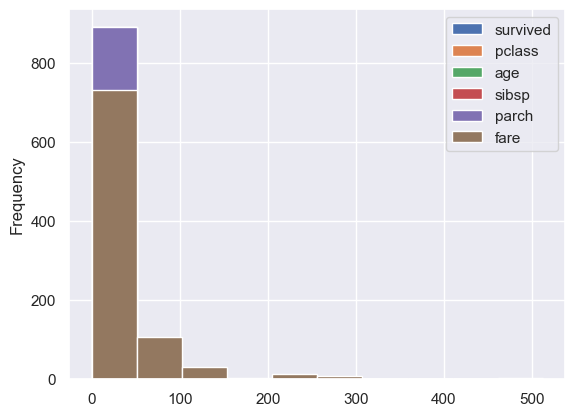

In [4]:
titanic.plot(kind = 'hist');

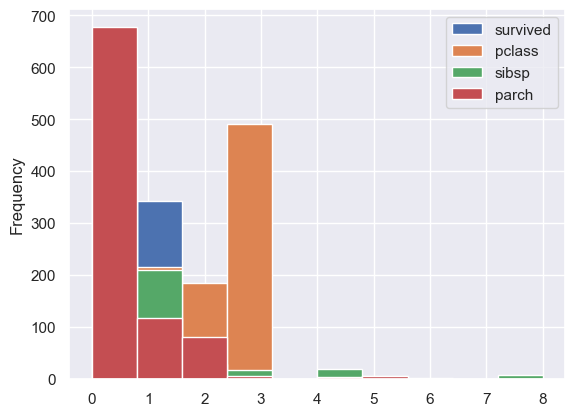

In [5]:
titanic[titanic.select_dtypes(include = 'int').columns].plot(kind = 'hist');

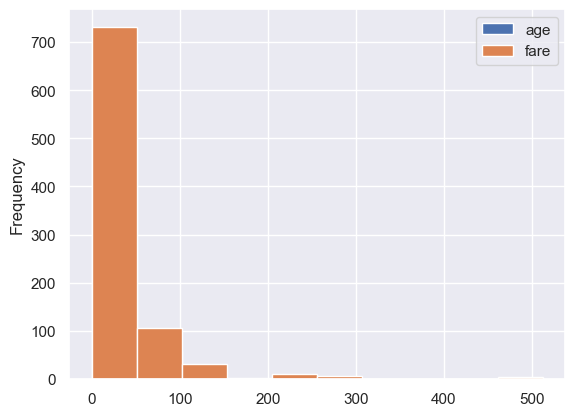

In [6]:
titanic[titanic.select_dtypes(include = 'float').columns].plot(kind = 'hist');

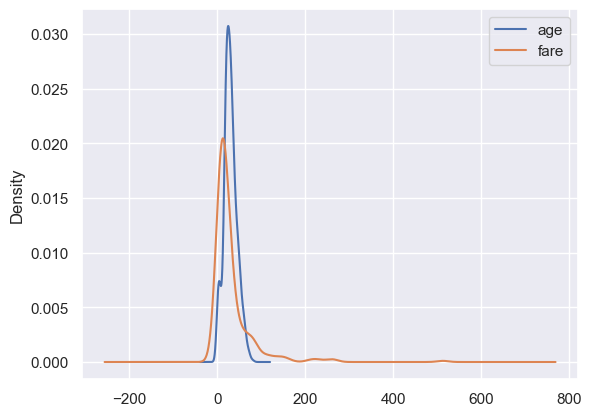

In [7]:
titanic[titanic.select_dtypes(include = 'float').columns].plot(kind = 'kde');

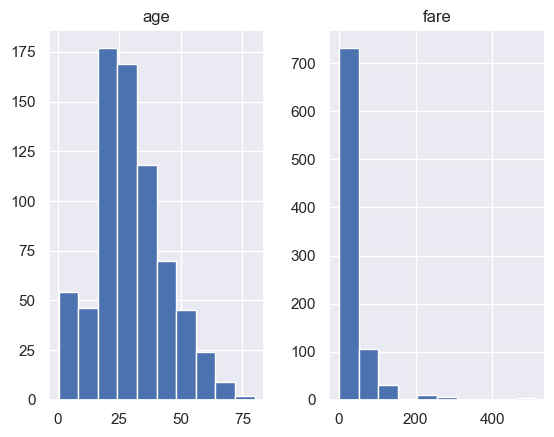

In [8]:
titanic[['age', 'fare']].hist();   # bins

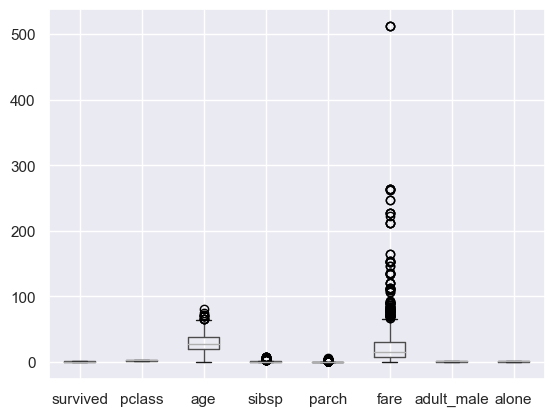

In [9]:
titanic.boxplot();


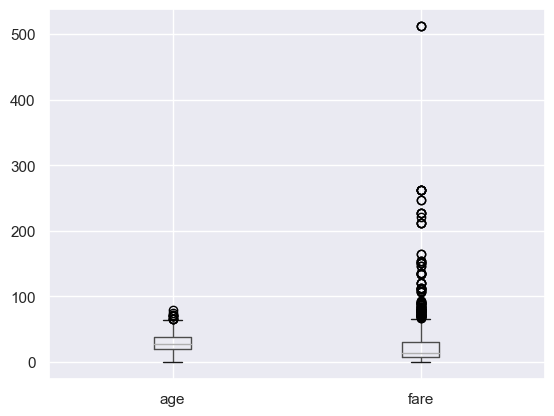

In [10]:
titanic[['age', 'fare']].boxplot();

Text(0, 0.5, 'count')

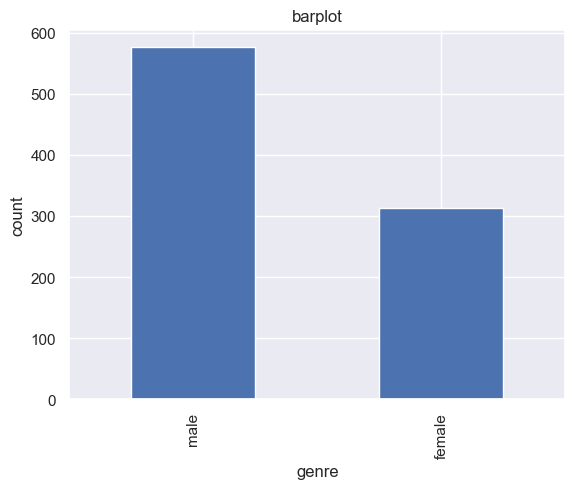

In [11]:
ax = titanic['sex'].value_counts() \
    .plot(kind = 'bar', title = 'barplot')
ax.set_xlabel('genre')
ax.set_ylabel('count')

Pour bien comprendre et personnaliser les diagrammes en barres:
- lien

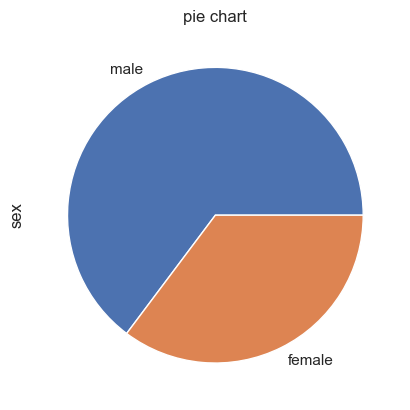

In [12]:
titanic['sex'].value_counts().plot(kind = 'pie', title = 'pie chart');  # titanic.[['sex', 'class']]

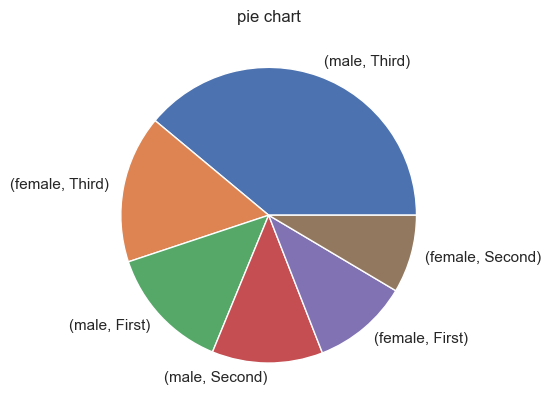

In [56]:
titanic[['sex', 'class']].value_counts().plot(kind = 'pie', title = 'pie chart');  

Pour bien comprendre et personnaliser le graphique circulaire:
- lien: 

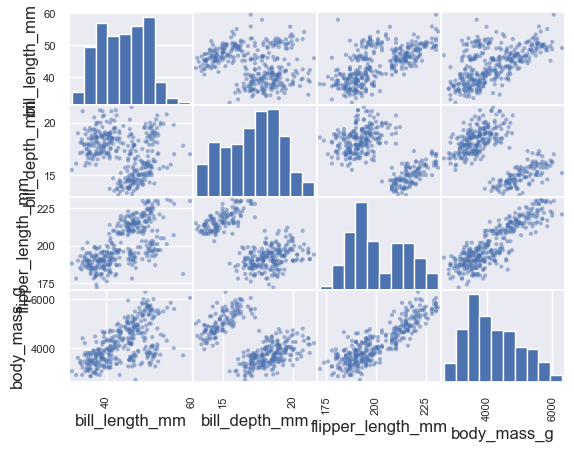

In [13]:
pd.plotting.scatter_matrix(penguins)
plt.show()

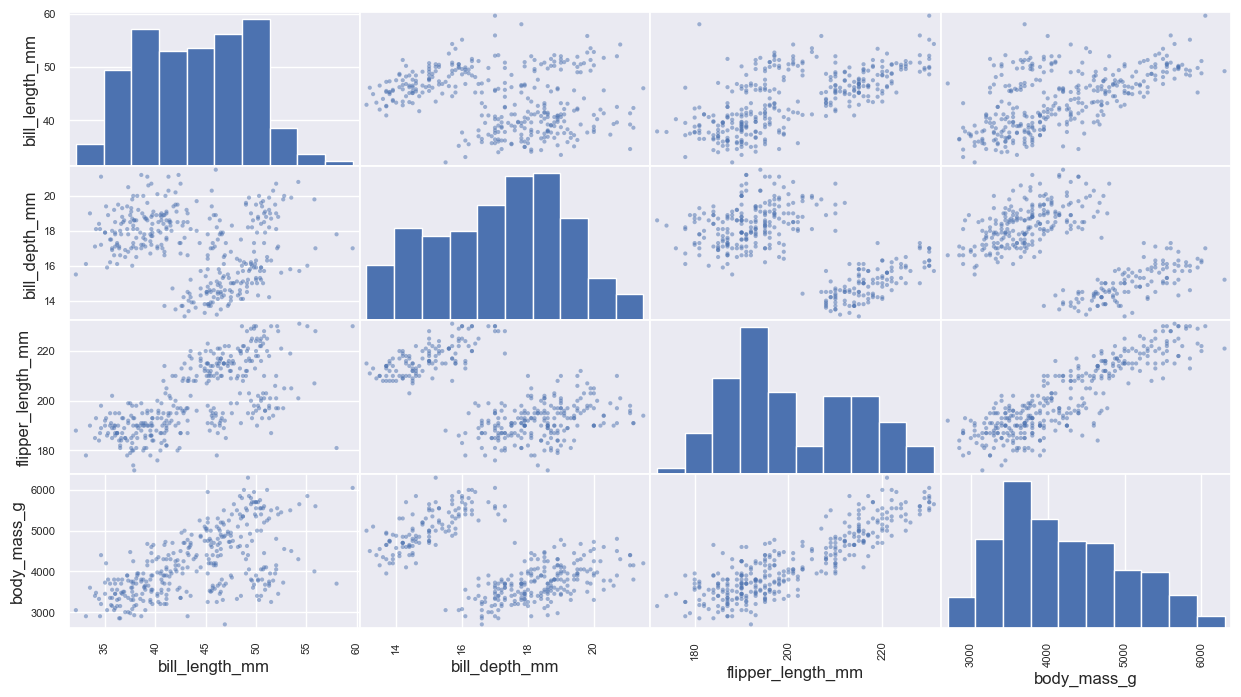

In [58]:
pd.plotting.scatter_matrix(penguins, figsize = (15, 8), diagonal = 'hist')
plt.show()

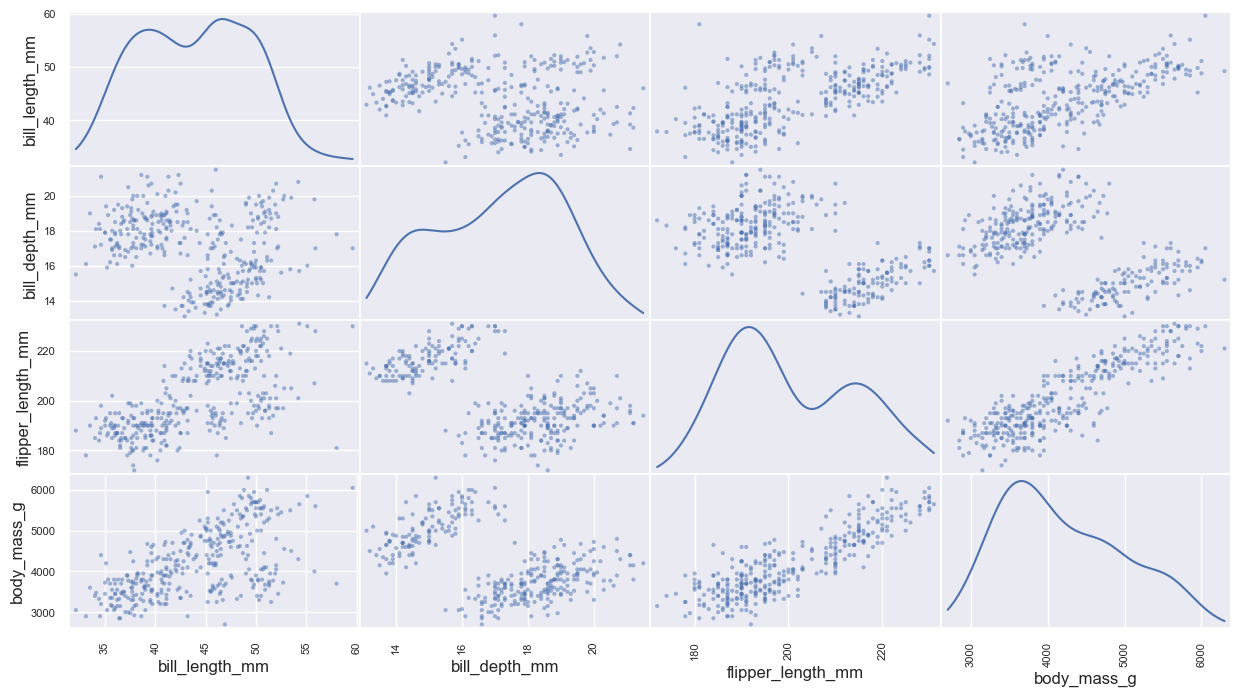

In [61]:
pd.plotting.scatter_matrix(penguins, figsize = (15, 8), diagonal = 'kde')
plt.show()

---
**Plot**

Generalsation de l'univariee - pandas

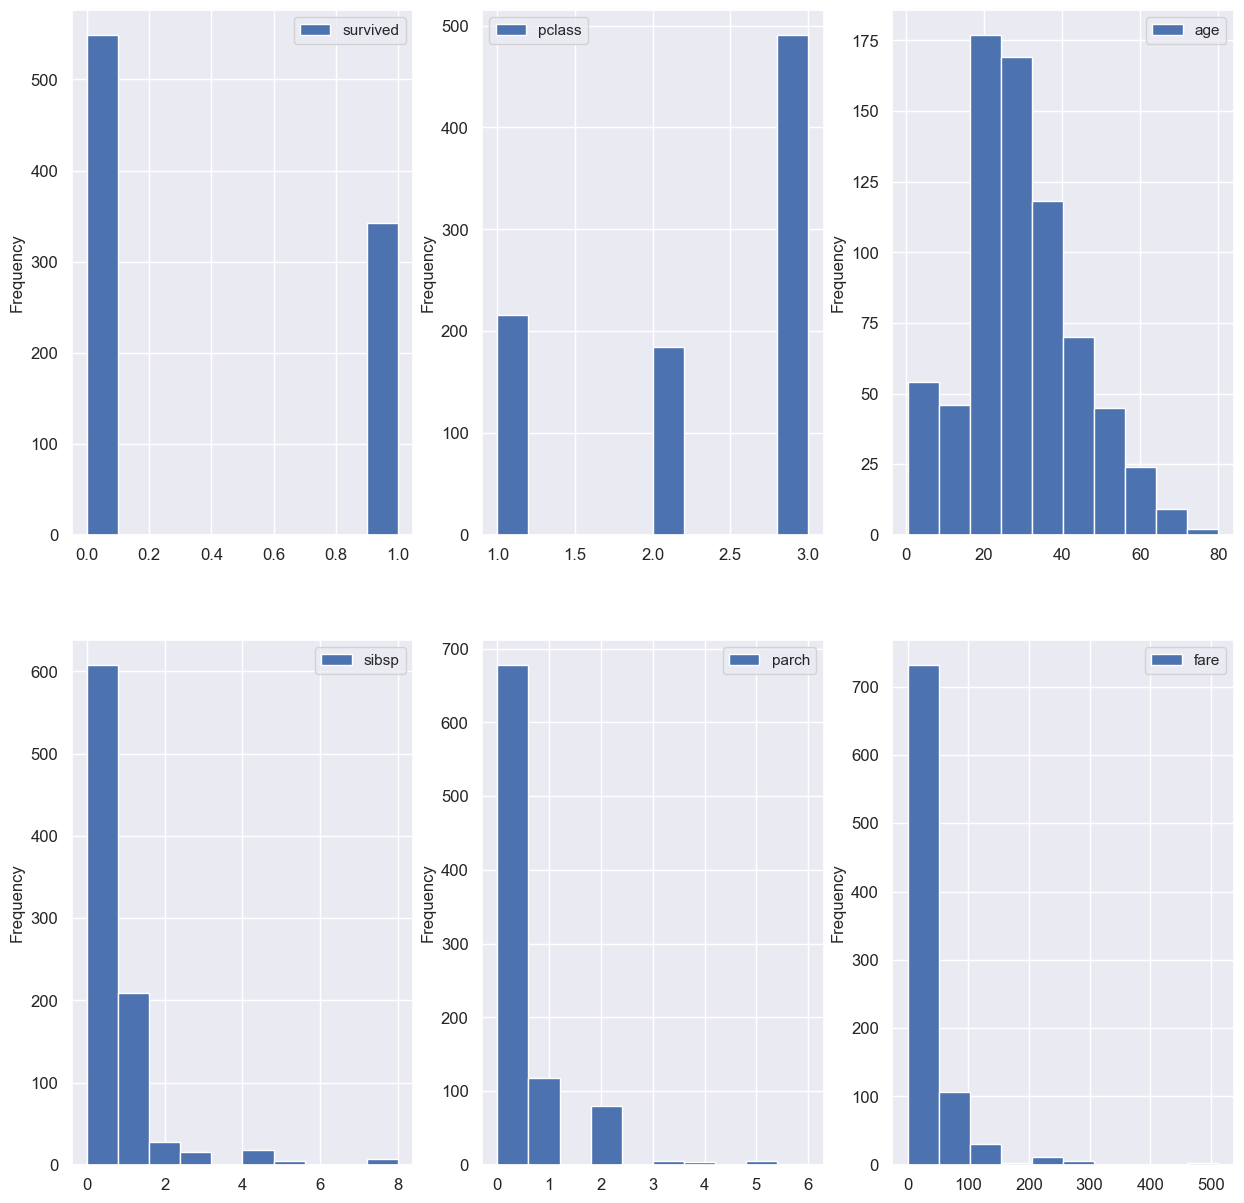

In [63]:
numcols = titanic.select_dtypes(include = ['number']).columns
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
k = 0
for i in range(len(axes)):
    for j in range(len(axes[i])):
        if k == len(numcols):
            break
        ax = axes[i][j]
        titanic[[numcols[k]]].plot(ax = ax, kind = 'hist', fontsize = 12)
        k += 1

---
SEABORN
- pairplot
- heatmap
- clustermap
- catplot
- scatterplot
- histplot
- boxplot
- relplot
- countplot
- barplot(nominales ou ordinales)
- pie(ordinales)
- kdeplot

---

1. plt.tight_layout(pad = 0.2, w_pad = 0.3, h_pad = 3.0)
2. plt.xlabel(colname[1], loc = 'center', rotation = 35)   <= pour univariee seulement
3. def mygraphics(df, rows = 3, cols = 3)
4. sns.boxplot(x = df['payment'], y = colname[1], data = df)
5. plt.savefig('diagram.png')


---
- pairplot
    - hue, height, diag_kind, kind, corner

In [15]:
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


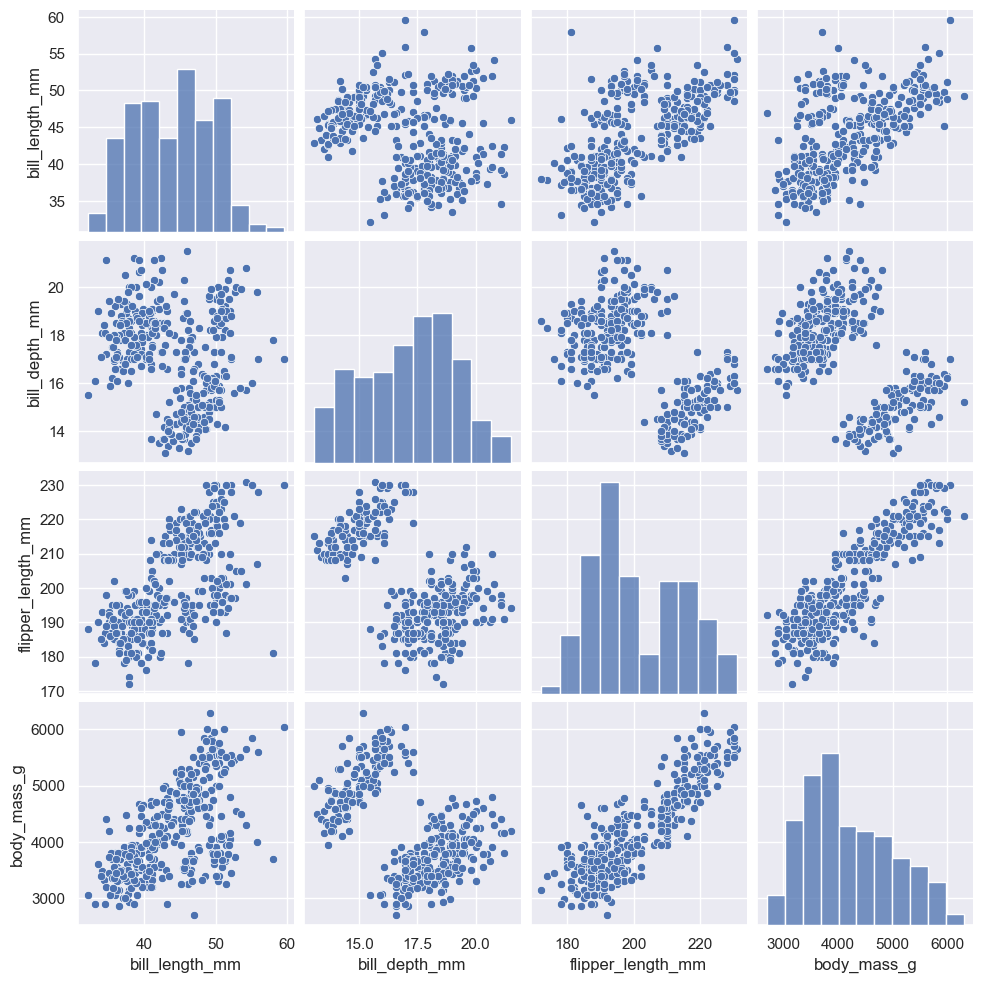

In [17]:
sns.pairplot(penguins);

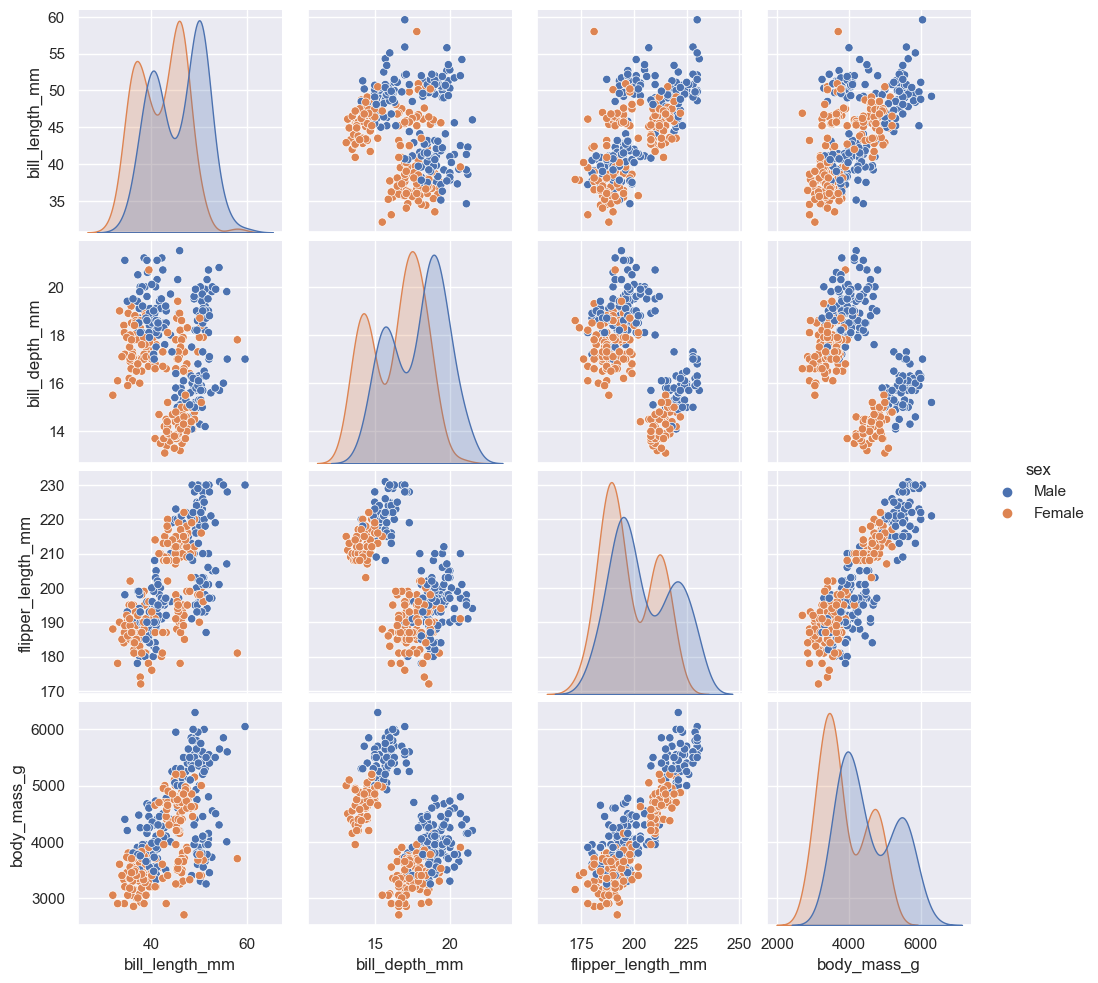

In [18]:
sns.pairplot(data = penguins, hue = 'sex');


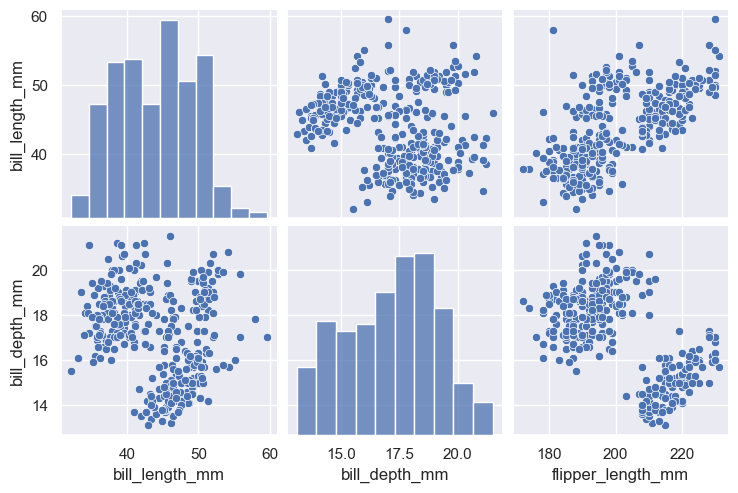

In [20]:
sns.pairplot(penguins,
            x_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
            y_vars = ["bill_length_mm", "bill_depth_mm"]);

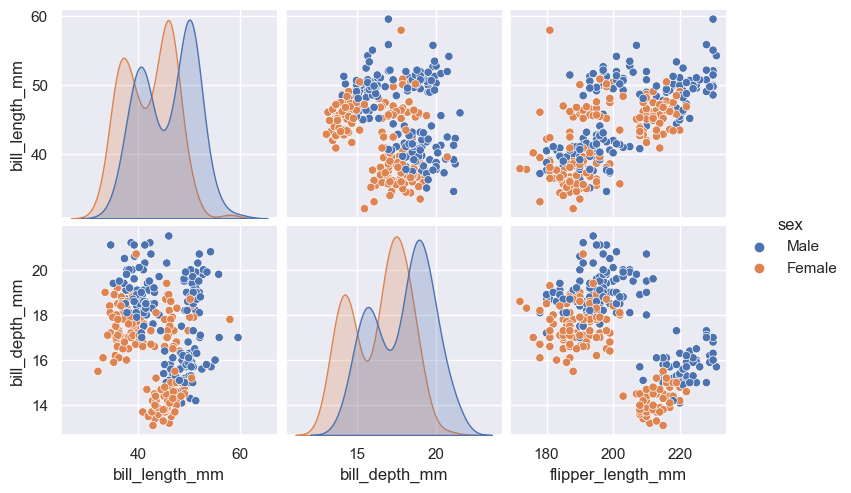

In [19]:
sns.pairplot(penguins,
            x_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
            y_vars = ["bill_length_mm", "bill_depth_mm"], hue = 'sex');

---
- heatmap

In [24]:
def correlations(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.select_dtypes(['number']).corr().round(2),
                annot = True, 
                cmap = 'coolwarm', 
                cbar = True, 
                annot_kws = {'fontsize': 10},
                vmin = -1,
                vmax = 1,
                lw = .1,
                # mask = np.triu(np.ones_like(df.select_dtypes(['number']).corr()))
            )
    plt.title("Matrice de correlation")
    plt.savefig('heatmap.png')
    plt.show()

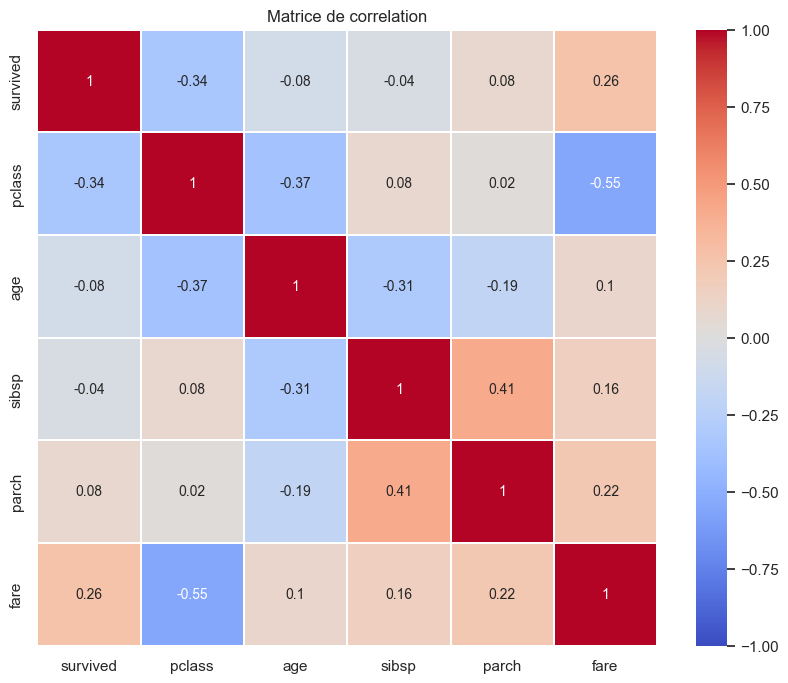

In [25]:
correlations(titanic)

---
- Matrice de correlation sans triangle superieur

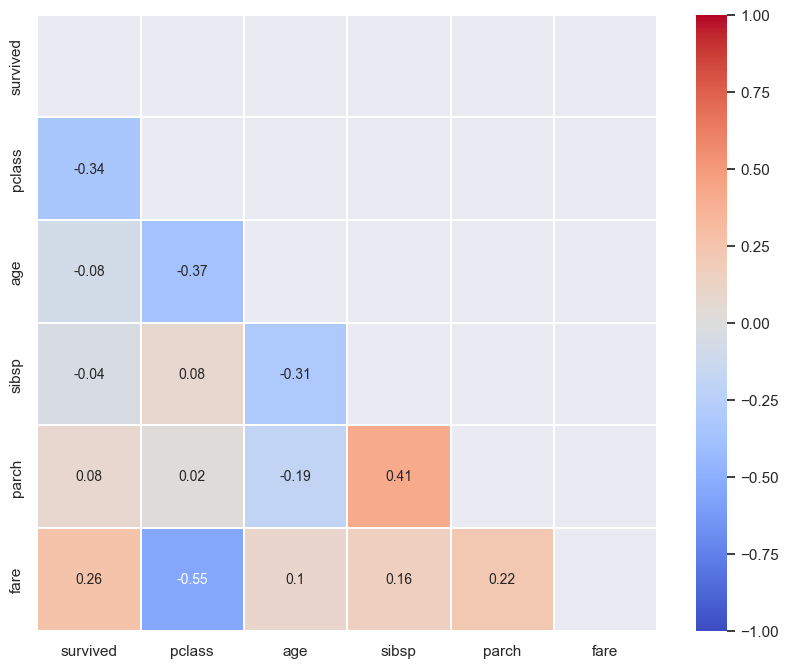

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(titanic.select_dtypes(['number']).corr().round(2),
            annot = True, 
            cmap = 'coolwarm', 
            cbar = True, 
            annot_kws = {'fontsize': 10},
            vmin = -1,
            vmax = 1,
            lw = .1,
            mask = np.triu(np.ones_like(titanic.select_dtypes(['number']).corr()))
            )
plt.show()

---
- Matrice de correlation sans triangle inferieur

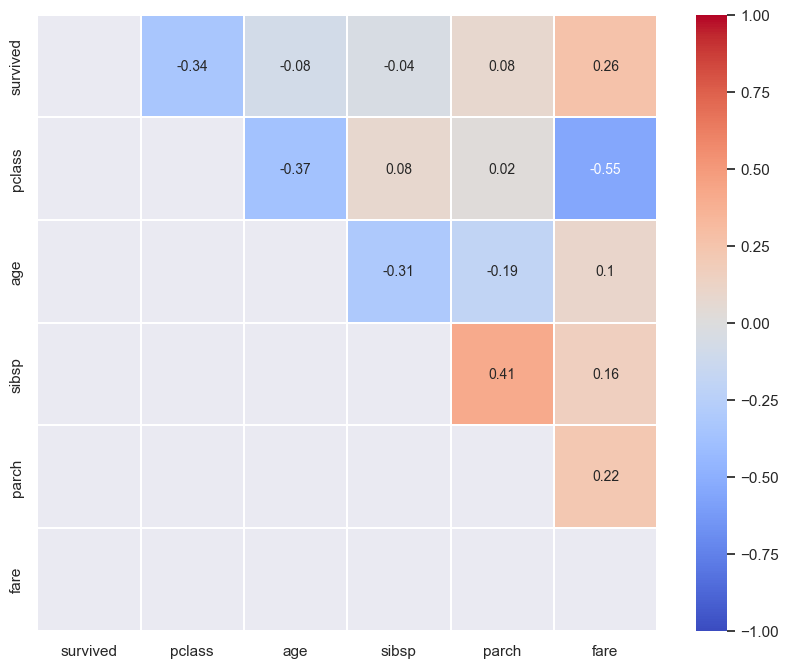

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(titanic.select_dtypes(['number']).corr().round(2),
            annot = True, 
            cmap = 'coolwarm', 
            cbar = True, 
            annot_kws = {'fontsize': 10},
            vmin = -1,
            vmax = 1,
            lw = .1,
            mask = np.tril(np.ones_like(titanic.select_dtypes(['number']).corr()))
            )
plt.show()

---
- clustermap(z_score, metric)

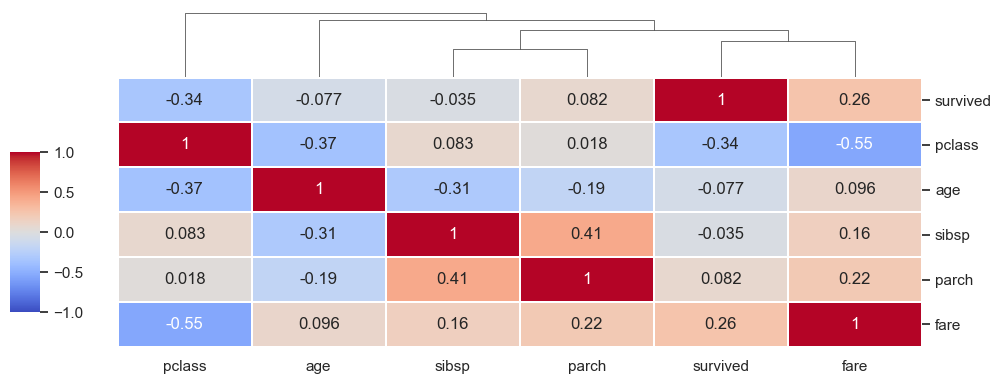

In [30]:
sns.clustermap(
                titanic.select_dtypes(['number']).corr(),
                figsize =(10, 4), 
                cmap = 'coolwarm', 
                annot = True,
                annot_kws = {'fontsize': 12},
                vmin = -1,
                vmax = 1,
                lw = .2,
                row_cluster = False,
                dendrogram_ratio = (.1, .2),
                cbar_pos = (0, .2, .03, .4)
)
plt.savefig('clustermap.png')
plt.show()

---
- catplot
  - box
  - cat

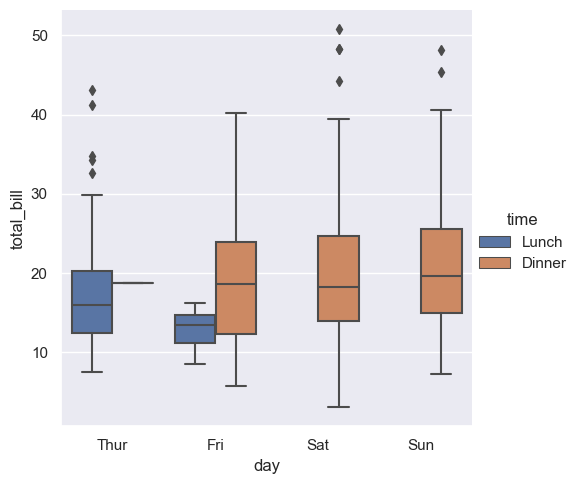

In [31]:
sns.catplot(x = 'day', y = 'total_bill', hue = 'time', data = tips, kind = 'box');

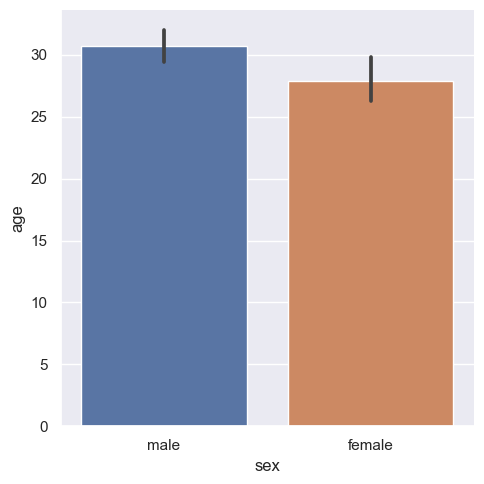

In [32]:
sns.catplot(x = 'sex', y = 'age', kind = 'bar',data = titanic);

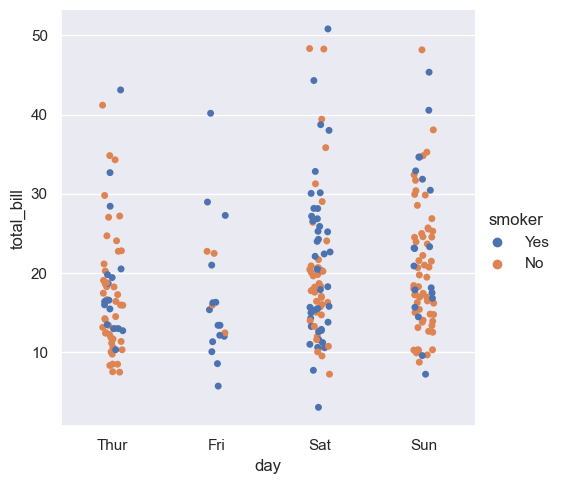

In [33]:
sns.catplot(x = 'day', y = 'total_bill', hue = 'smoker', data = tips, kind = 'strip');

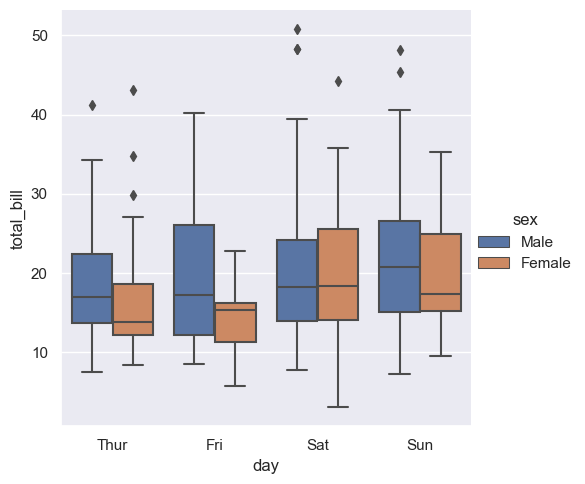

In [34]:
sns.catplot(x = 'day', y = 'total_bill', hue = 'sex', data = tips, kind = 'box');

---
- countplot

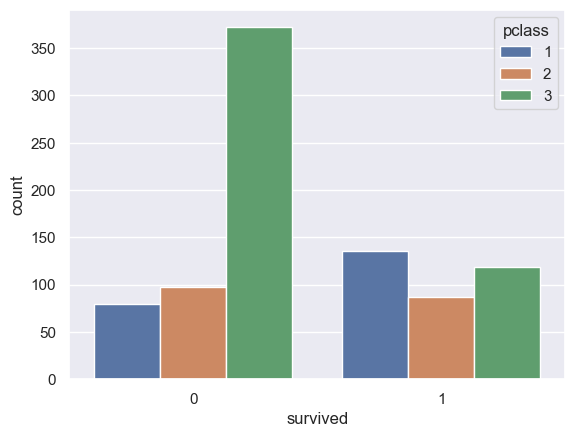

In [35]:
sns.countplot(x = 'survived', hue = 'pclass', data = titanic);

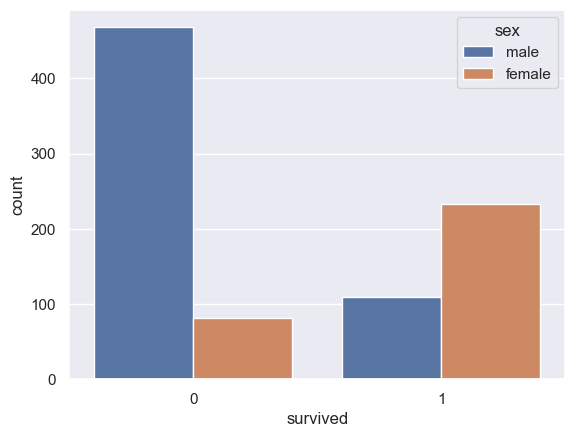

In [36]:
sns.countplot(x = 'survived', hue = 'sex', data = titanic);

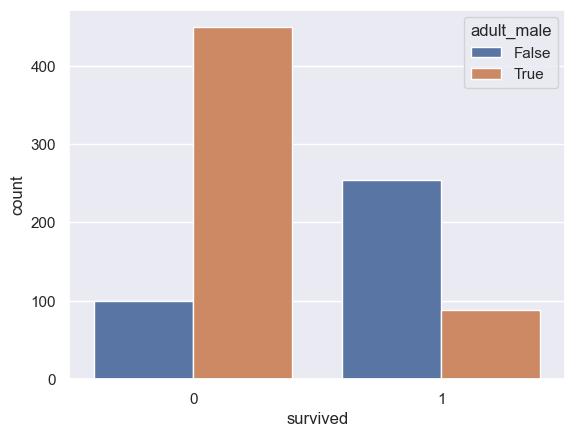

In [37]:
sns.countplot(x = 'survived', hue = 'adult_male', data = titanic);

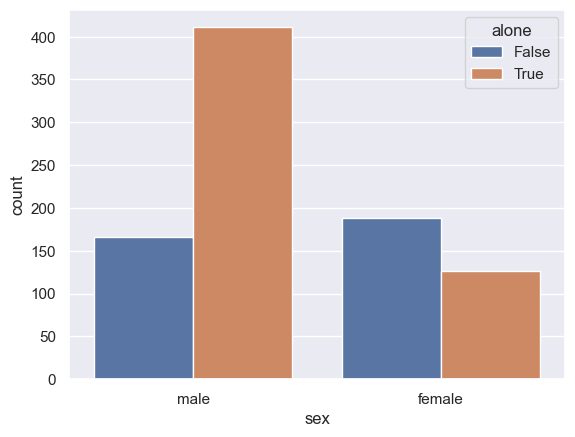

In [38]:
sns.countplot(x = 'sex', hue = 'alone', data = titanic);

---
- scatterplot

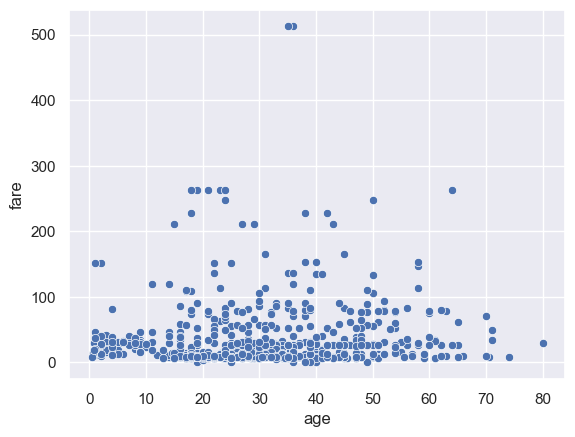

In [39]:
sns.scatterplot(x = 'age', y = 'fare', data = titanic);

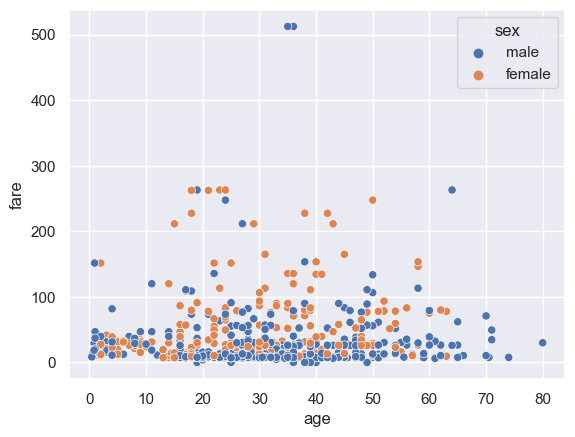

In [40]:
sns.scatterplot(x = 'age', y = 'fare', hue='sex', data = titanic);

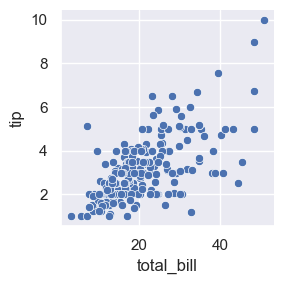

In [41]:
sns.FacetGrid(tips).map(sns.scatterplot, "total_bill", "tip");

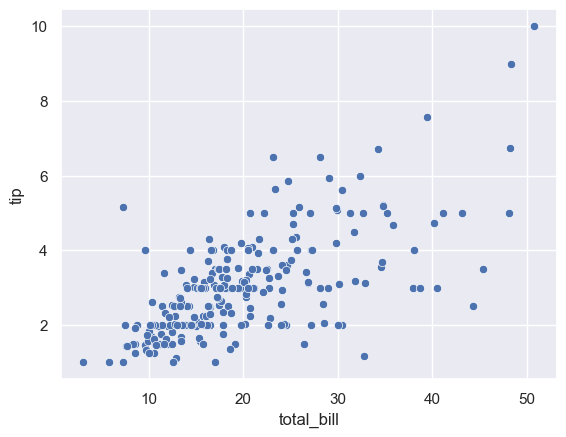

In [42]:
sns.scatterplot(data = tips, x = "total_bill", y = "tip", );

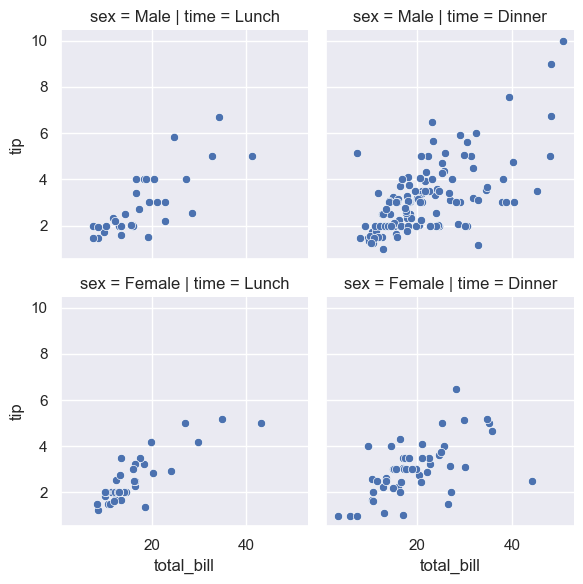

In [43]:
sns.FacetGrid(tips, col="time",  row="sex").map(sns.scatterplot, "total_bill", "tip");

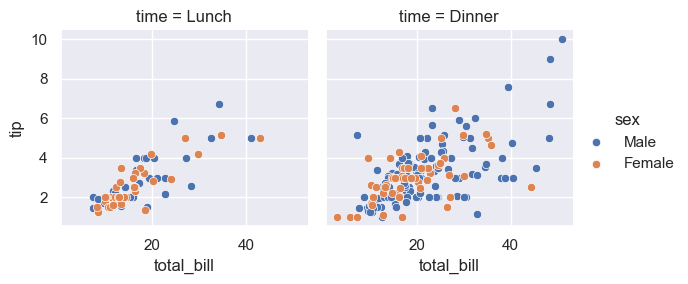

In [44]:
g = sns.FacetGrid(tips, col = "time", hue = "sex")
g.map_dataframe(sns.scatterplot, x = "total_bill", y = "tip")
g.add_legend();

In [45]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


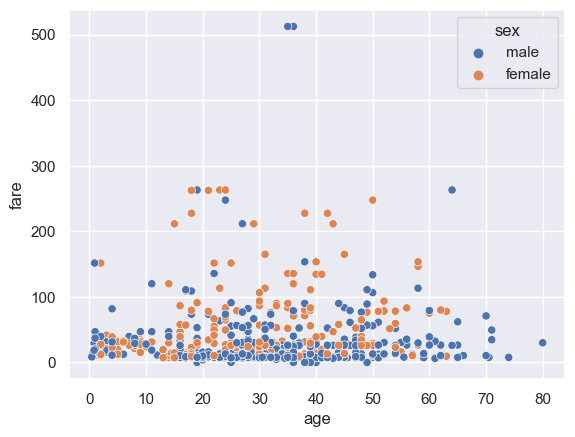

In [46]:
sns.scatterplot(data = titanic, x = "age", y = "fare", hue = 'sex');

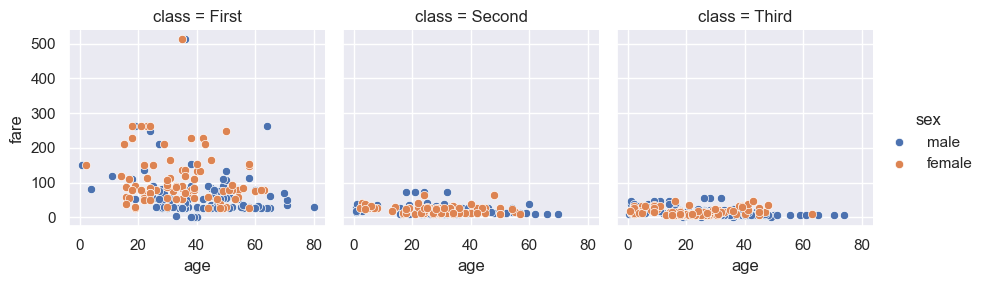

In [47]:
# sns.scatterplot(data = titanic, x = "age", y = "fare", hue = 'sex');
sns.FacetGrid(titanic, col="class", hue = 'sex').map(sns.scatterplot, "age", "fare").add_legend()
plt.savefig('scatterplot.png')

---
- Generalisation
   - creer ses propres graphiques


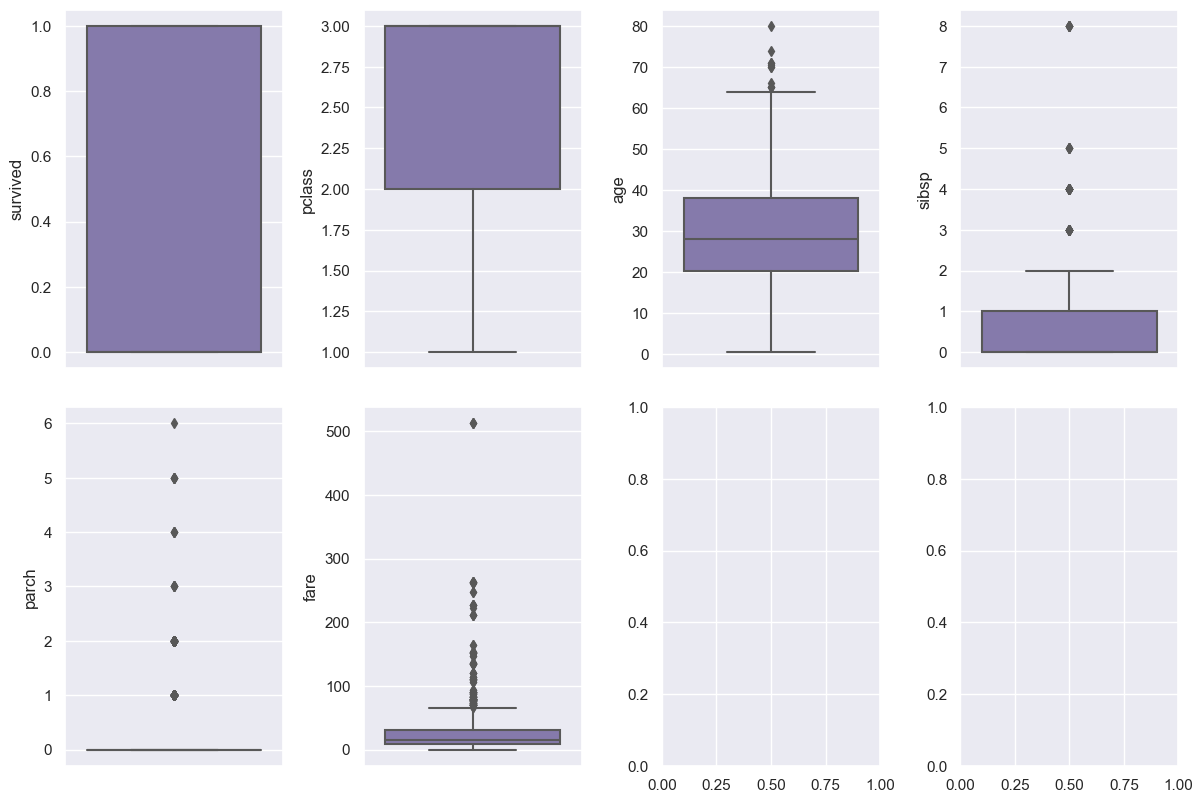

In [48]:
numcols = titanic.select_dtypes('number')
fig, ax = plt.subplots(2,4,figsize = (12,8))
k = 0
ax = ax.flatten()
for col in numcols:
    sns.boxplot(y = col, data = titanic, color = 'C4', ax = ax[k])
    k += 1
    plt.tight_layout(pad = 0.5, w_pad = 1, h_pad = 2.0)

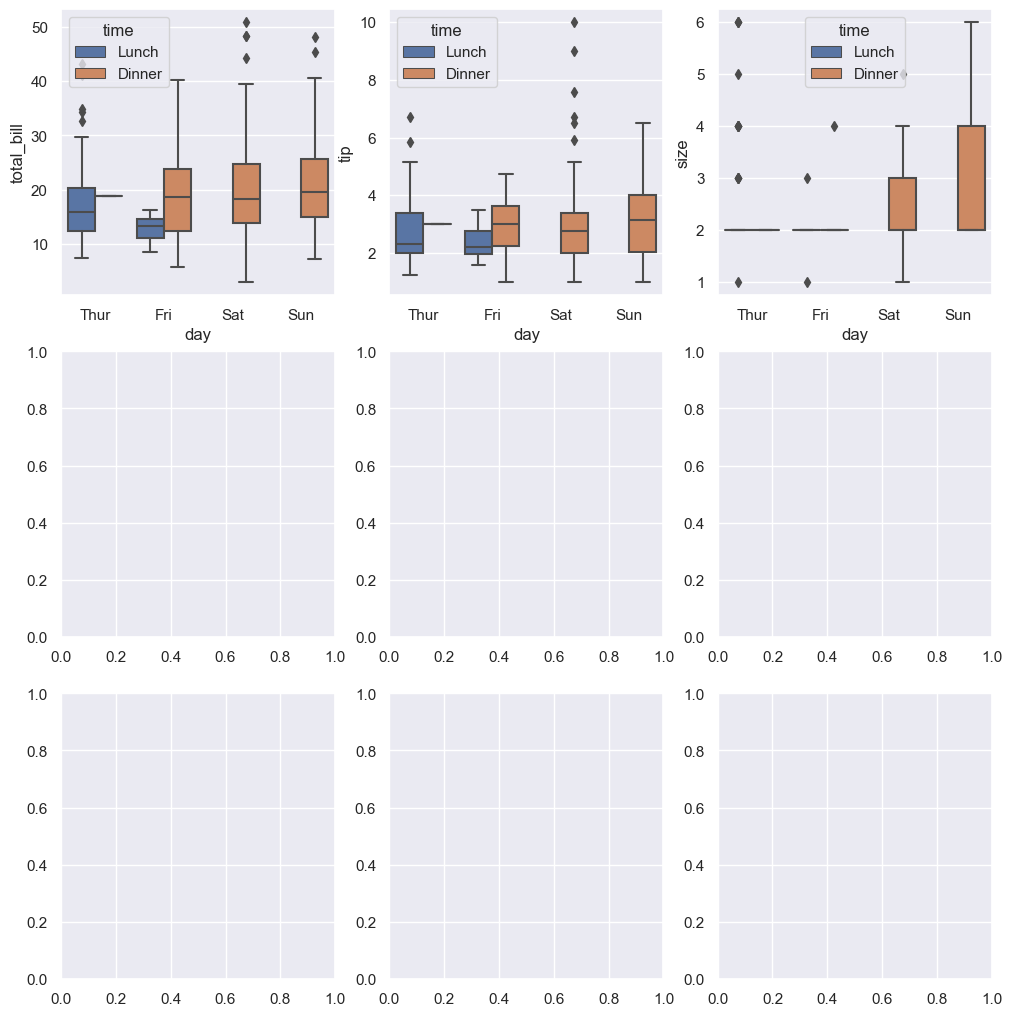

In [49]:
fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (10, 10))
ax = ax.flatten()
i = 0
for col, value in tips.select_dtypes('number').items():
    sns.boxplot(x = 'day', y = col, ax = ax[i], hue = 'time', data = tips)
    i += 1
plt.tight_layout(pad = .1, w_pad = .2, h_pad = .2)

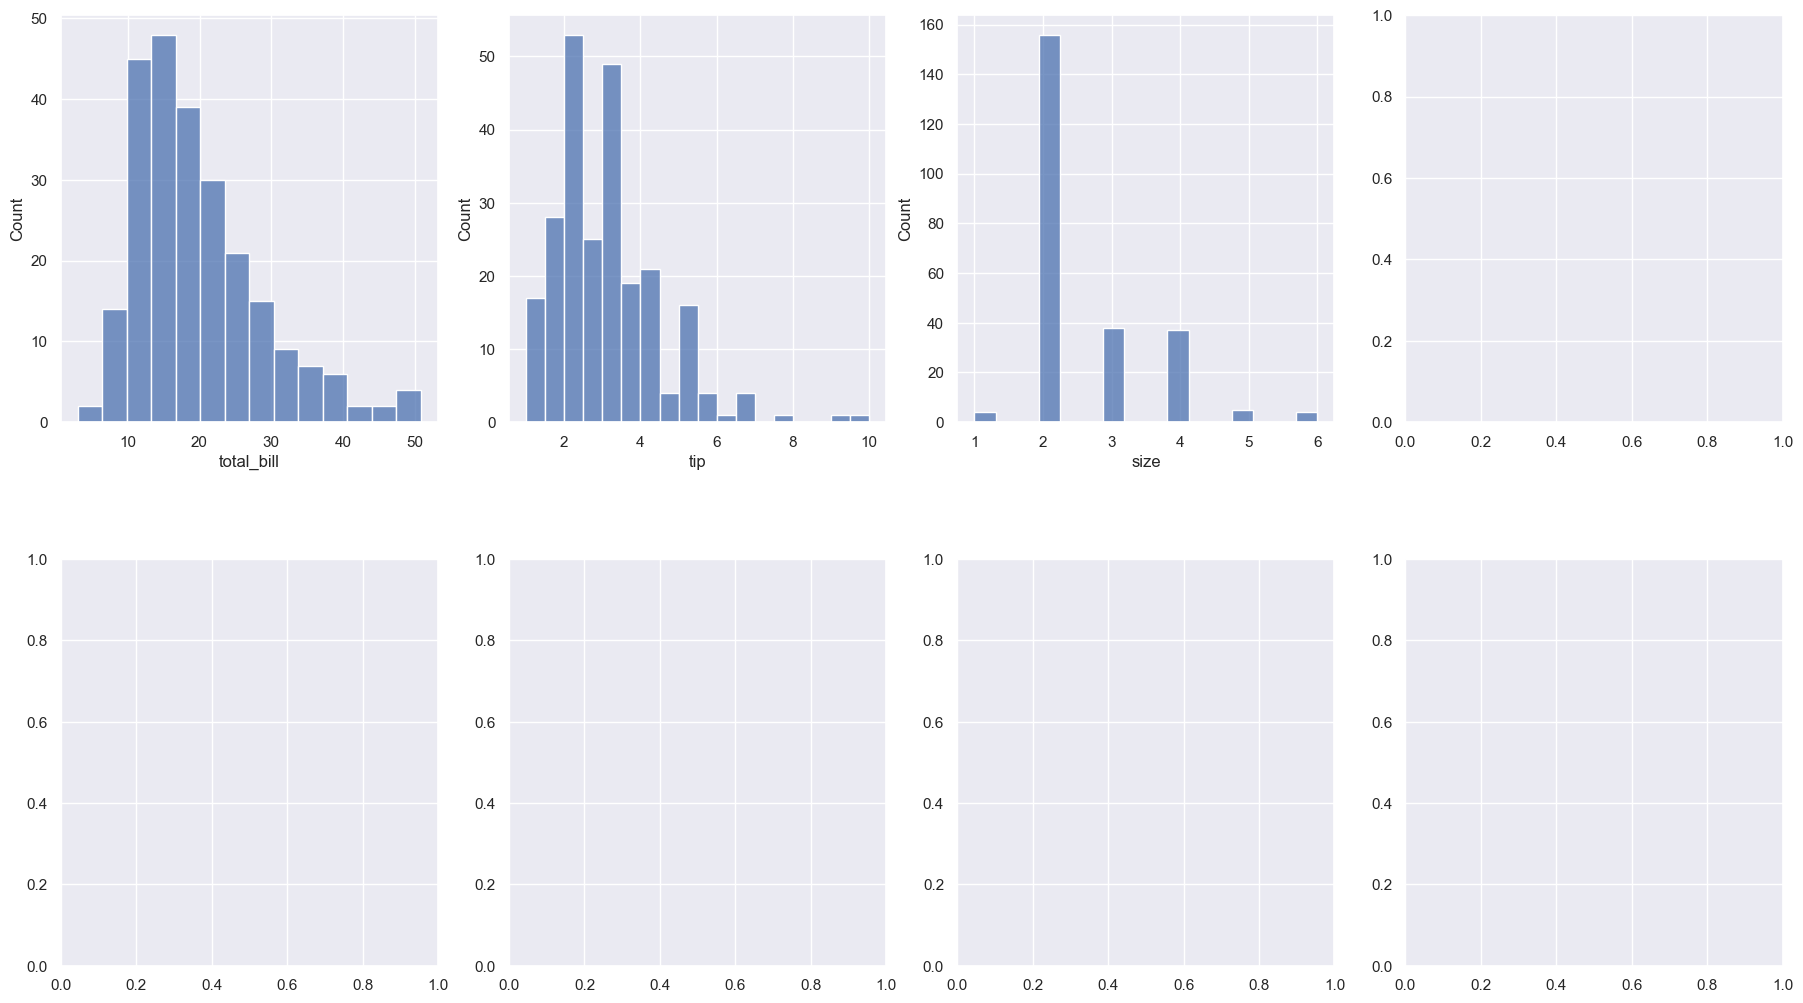

In [50]:
fig, ax = plt.subplots(ncols = 4, nrows = 2, figsize = (18, 10))
ax = ax.flatten()
i = 0
for col, value in tips.select_dtypes('number').items():
    sns.histplot(value, ax = ax[i])
    i += 1
plt.tight_layout(pad = .5, w_pad = .7, h_pad = 5)

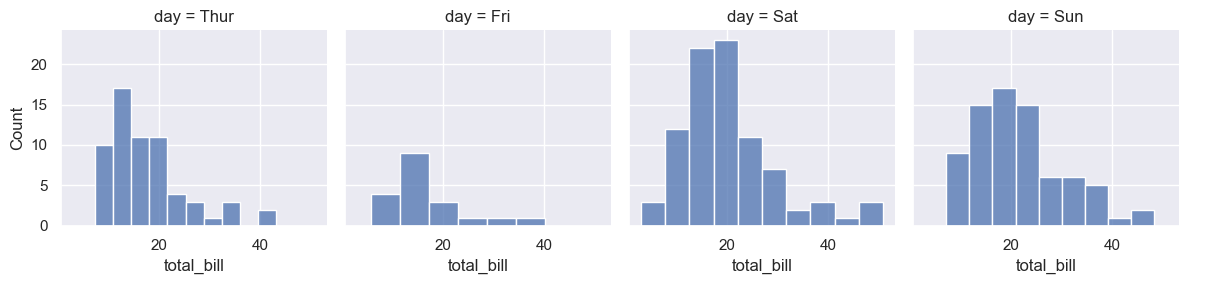

In [51]:

sns.FacetGrid(tips, col = 'day').map(sns.histplot, 'total_bill').add_legend()

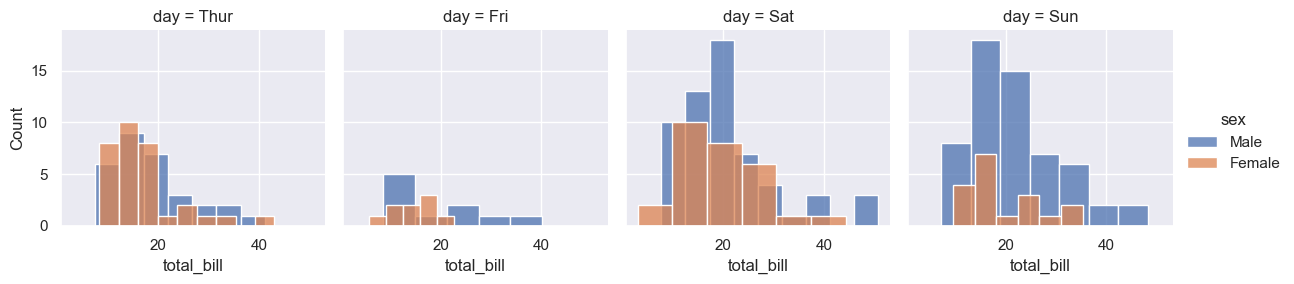

In [52]:

sns.FacetGrid(tips, col = 'day', hue = 'sex').map(sns.histplot, 'total_bill').add_legend()
plt.savefig('hist2.png')

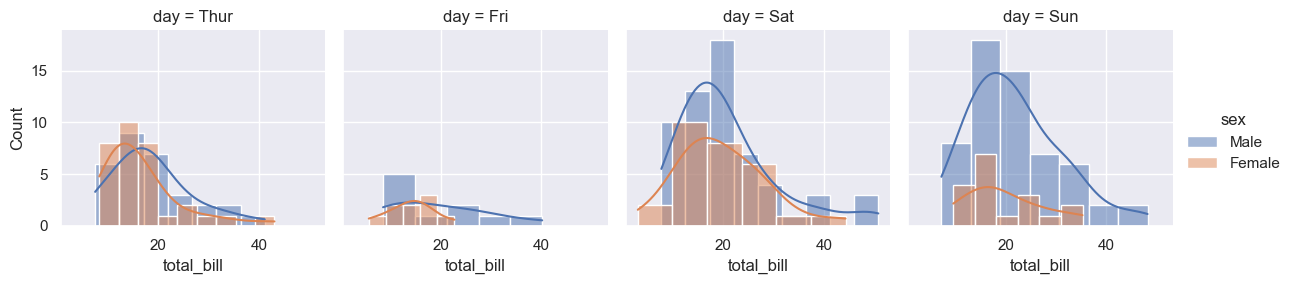

In [53]:
fg = sns.FacetGrid(tips, col = 'day', hue = 'sex')
fg.map(sns.histplot, 'total_bill', kde = True).add_legend()
# fg.set_titles('fffff')
# fg.set(ylim = (0, 50))
plt.show() 

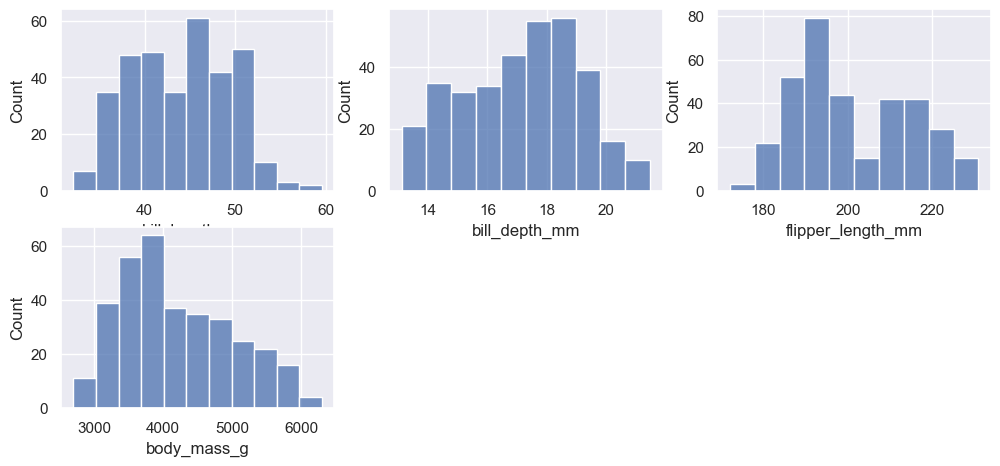

In [54]:
plt.figure(figsize=(12, 8))
for col in enumerate(penguins.select_dtypes(include = ['float64'])):
    plt.subplot(3, 3, col[0] + 1)
    sns.histplot(x = col[1], data = penguins)
plt.show() 

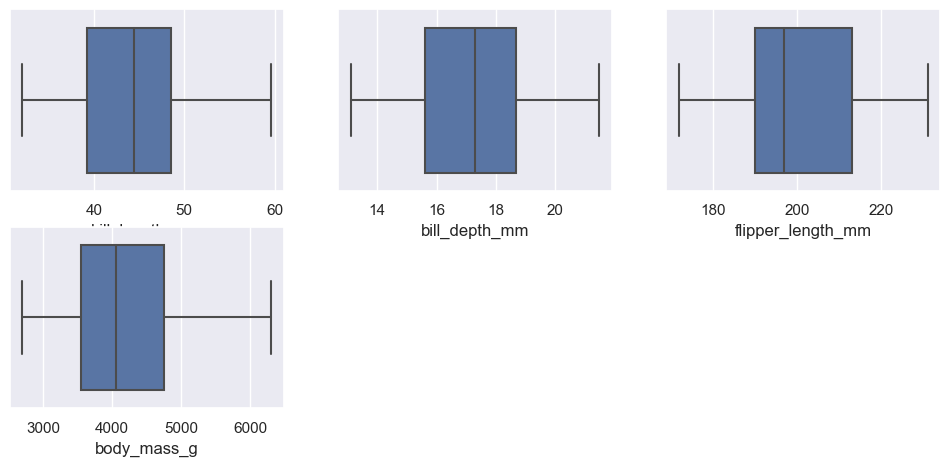

In [55]:
plt.figure(figsize=(12, 8))
for col in enumerate(penguins.select_dtypes(include = ['float64'])):
    plt.subplot(3, 3, col[0] + 1)
    sns.boxplot(x = col[1], data = penguins)
plt.show() 